# 4 - Exploration of Historical NBA Team Efficiency (Part III)
Alright, so I was planning to tackle both rebounding and turnovers in the last post. I honestly didn't think there was that much to think about for rebounding. I stand corrected. I'm going to have to cop one of these shirts to represent my progress:
![](https://pbs.twimg.com/media/BrYeDsyCUAEvhU3.jpg)

## Turnovers
Let's talk turnovers. These turnovers are good and go for about a buck at McDonald's:
![](https://myrivendell.files.wordpress.com/2012/06/9927_1_17_appleturnover_1337530896.jpg)

Ok, cool, let's talk about the other turnover:
<img src = "http://bloximages.chicago2.vip.townnews.com/heraldextra.com/content/tncms/assets/v3/editorial/6/52/6529b605-5da1-5cf3-9512-1c77ee2d1cbf/54af8dbe43866.image.jpg" style = "width: 400px;"/>

I honestly can't even be sure who's turnover that is in the photo. You'd have to guess the BYU guy cause he got that, you know, human reaction delay of still mentally believing the goal is in sight where in reality his world has already been crushed and the poor guy has no idea.

Turnovers can happen in a few ways if I think about it:
- Steal
- Offensive foul
- Violations (3 in the key, 24 second, halfcourt... etc)
- Out of bounds

It really encapsulates many aspects of basketball, both individual and team-based. For example, something as simple as a steal can have so much context. Even if we just look at passing scenarios
- Was a pass intercepted because the defender was in the right place at the right time?
- Was a pass intercepted because the passer sucks at passing?
- Was a pass intercepted because the teammates weren't on the same page because they're not quite familiar with a play?
- Was a pass intercepted because the passer thought the ref was a player somehow?

Again, there is much to be desired in terms of **how** a steal developed, and that essentially goes for any turnover. Let's just take a look really quickly at raptors turnovers.

In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [5]:
%%R
library(ggplot2)
library(gridExtra)
library(scales)

In [6]:
# Load libraries & initial config
import pandas as pd
import numpy as np
import boto3
from StringIO import StringIO

In [7]:
# Retrieve team stats from S3
teamAggDfToAnalyze = pd.read_csv('https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/data/teamAggDfToAnalyze.csv', index_col = 0)
print teamAggDfToAnalyze.dtypes

baseStats_Season             object
perGameStats_Tm              object
baseStats_W                   int64
baseStats_L                   int64
baseStats_W/L%              float64
baseStats_SRS               float64
baseStats_Pace              float64
baseStats_Rel_Pace          float64
baseStats_ORtg              float64
baseStats_Rel_ORtg          float64
baseStats_DRtg              float64
baseStats_Rel_DRtg          float64
perGameStats_Age            float64
perGameStats_FG             float64
perGameStats_FGA            float64
perGameStats_FG%            float64
perGameStats_2P             float64
perGameStats_2PA            float64
perGameStats_2P%            float64
perGameStats_3P             float64
perGameStats_3PA            float64
perGameStats_3P%            float64
perGameStats_FT             float64
perGameStats_FTA            float64
perGameStats_FT%            float64
perGameStats_ORB            float64
perGameStats_DRB            float64
perGameStats_TRB            

In [19]:
def tovPrepare(team = None):
    if team is None:
        teamDf = teamAggDfToAnalyze
    else:
        teamDf = teamAggDfToAnalyze[teamAggDfToAnalyze['perGameStats_Tm'] == team]

    # Prepare ORB / DRB data    
    teamTovDf = teamDf[[
        'season_start_year',
        'perGameStats_TOV'
    ]].groupby(['season_start_year']).agg({
        'perGameStats_TOV': np.average,   # We average the percentage here because when we look at league averages, we will have more than one record per year and shot type
    })
    
    teamTovDf.reset_index(inplace = True)
    
    return teamTovDf

rapsTovDf = tovPrepare('TOR')

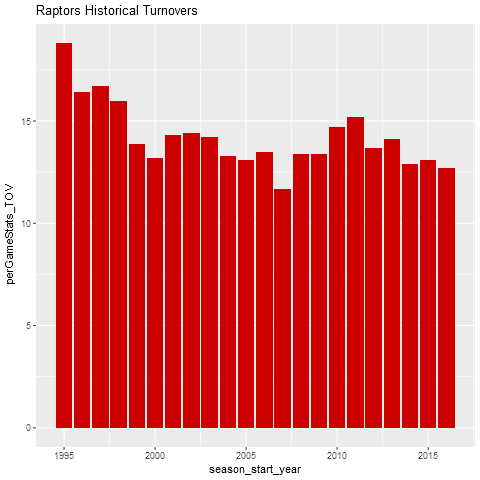

In [41]:
%%R -i rapsTovDf

tovPlot <- function(tovDf, teamName, color = 'gray'){
    # Turnovers bar
    stackedBarStl = ggplot(
        tovDf,
        aes(
            x = season_start_year,
            y = perGameStats_TOV
        )
    ) + 
    geom_bar(stat = 'identity', fill = color) +
    ggtitle(sprintf("%s Historical Turnovers", teamName))

    grid.arrange(stackedBarStl, ncol = 1)
}

tovPlot(rapsTovDf, 'Raptors', 'red3')

How about league average?

In [22]:
leagueTovDf = tovPrepare()

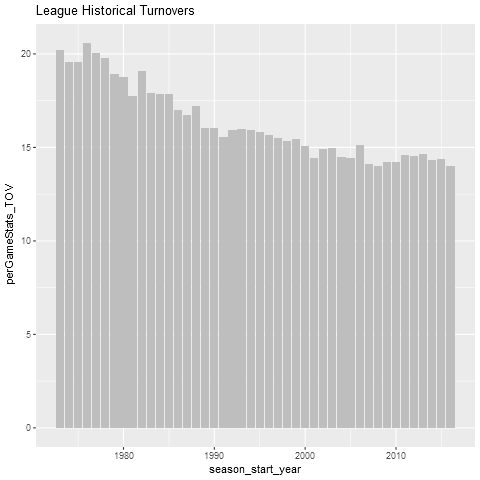

In [42]:
%%R -i leagueTovDf
tovPlot(leagueTovDf, 'League')

Not too sure if there's anything too out of the blue here. We don't average anything too far off from the league average - pretty vanilla like shooting was. In fact, very much the same story: We averaged less turnovers when we had a more legitimized team, and more turnovers when we were in "rebuilding" phases (by the loose "eras" I defined back in part I of this series of efficiency posts). Let's take a look at our point guards year by year (I'm making the assumption here that turnovers are largely controlled by the point guard)

- <span style="color:red">**1995-1996**: Damon Stoudemire (rookie)</span>
- <span style="color:red">**1996-1997**: Damon Stoudemire</span>
- <span style="color:red">**1997-1998**: No one, really. Stoudemire was traded for Alvin Williams partway through, Chauncey Billups was acquired halfway thorugh the season but he was traded immediately after the season</span>
- <span style="color:red">**1998-1999**: Alvin Williams, also have T-Mac and VC at this point</span>
- **1999-2000**: Alvin Williams, Muggsy Bogues
- **2000-2001**: Alvin Williams, Chris Childs, VC
- **2001-2002**: Alvin Williams, Chris Childs, VC
- **2002-2003**: Alvin Williams, Lindsey Hunter, Rafer Alston, VC
- **2003-2004**: Alvin Williams, Jalen Rose, VC
- **2004-2005**: Alvin Williams, Jalen Rose, Rafer Alston (CB4 all star now)
- **2005-2006**: Alvin Williams, Jose Calderon, Mike James
- **2006-2007**: Jose Calderon, TJ Ford
- <span style="color:green">**2007-2008**: Jose Calderon, TJ Ford</span>
- **2008-2009**: Jose Calderon
- **2009-2010**: Jose Calderon, Jarrett Jack, DD (rookie), CB4 leaves
- **2009-2010**: Jose Calderon, Jarrett Jack, DD
- <span style="color:red">**2010-2011**: Jose Calderon, Jerryd Bayless, Leandro Barbosa, DD</span>
- <span style="color:red">**2011-2012**: Jose Calderon, Jerryd Bayless, DD</span>
- **2012-2013**: KLow, DD
- **2013-2014**: KLow, DD, The General Greivis
- <span style="color:green">**2014-2015**: KLow, DD, The General, 6Man Lou Will</span>
- <span style="color:green">**2015-2016**: KLow, DD, Norman Powell, Corey Jo</span>


Hmm. It's not capturing the whole story, and it certainly doesn't correlate to point guards in particular, but some interesting things of note:
- When the raptors became an expansion team, it took a few years to get the turnovers down handing the reigns over to a rookie Damon Stoudemire with little support
- We found at least a bit of our groove in the Alvin Williams era, where his guards changed from time to time but him and VC seemed to be able to hold the turnovers to a sub league average level
- After CB4 left, we had a few seasons of turnovers with Calderon running the point and a new guard in Jerryd Bayless
- KLow comes along and saves everything as DD becomes Kobe-lite


Perhaps the turnovers have less to do with the point guard himself, but more to do with whatever star player is consuming the possessions. We see that essentially the whole time VC and CB4 are in their "primes", we've been able to keep the turnovers down. Today, we have **TWO** all stars in KLow and DD, and the turnovers have been kept low as well.

Let's take a look at Rockets and Spurs again for fun. I assume they are two extremes today.

In [53]:
rocketsTovDf = tovPrepare('HOU')

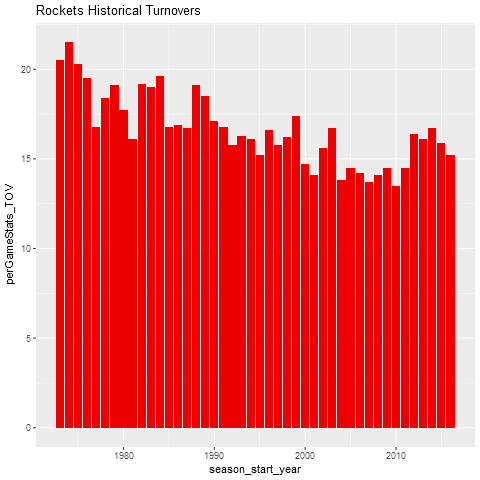

In [55]:
%%R -i rocketsTovDf
tovPlot(rocketsTovDf, 'Rockets', 'red2')

#HARDENERA

In [57]:
spursTovDf = tovPrepare('SAS')

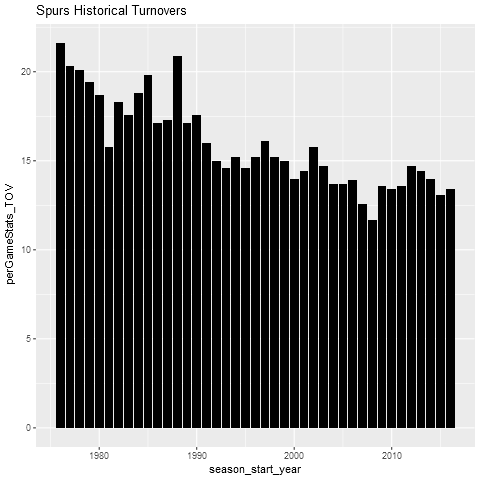

In [59]:
%%R -i spursTovDf
tovPlot(spursTovDf, 'Spurs', 'black')

What stands out  more to me here is not how low the spurs turnovers are, but how the raptors are keeping their turnovers as low as the spurs! Just for curiosity, I want to see who has the lowest turnovers this year:

In [73]:
tov20162017AllTeams = teamAggDfToAnalyze[teamAggDfToAnalyze['season_start_year'] == 2016][[
    'season_start_year',
    'perGameStats_TOV',
    'perGameStats_Tm'
]].sort_values('perGameStats_TOV', ascending = False)

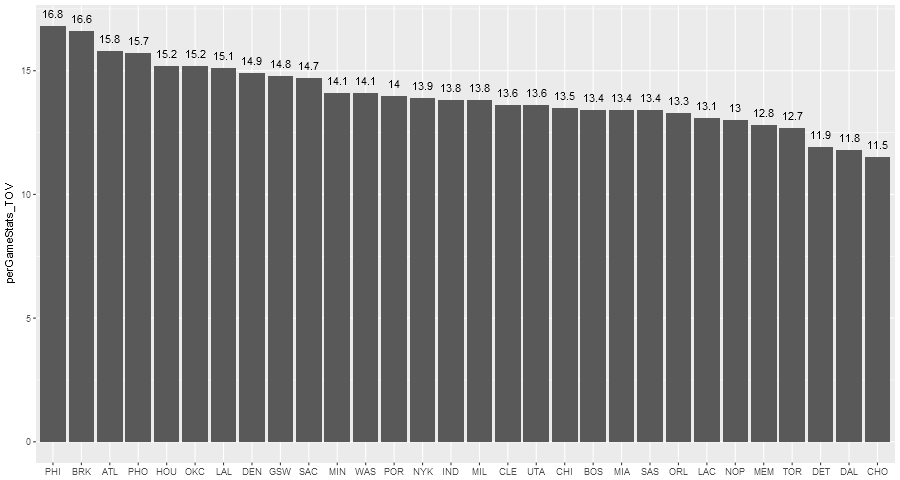

In [83]:
%%R -i tov20162017AllTeams -w 900 -u px

ggplot(
    tov20162017AllTeams,
    aes(
        x = reorder(perGameStats_Tm, -perGameStats_TOV),
        y = perGameStats_TOV
    )
) +
geom_bar(stat = 'identity') +
geom_text(aes(label = perGameStats_TOV), vjust = -1) +
theme(axis.title.x=element_blank())

Looking at ORB and TOV... I know that they matter, but... do they matter? Looking at this chart, I can see the point made for if you were (wait wtf, DET, DAL, and CHO lead the league in least turnovers??) Detroit vs let's say Philly, you've just had ~5 possessions taken away from you where you could've gotten an easy basket. But if you are Philly, would you really have gotten an easy basket anyways? That's not even a knock at Philly, that's just saying, not every single turnover would've taken away a score, right? If I'm playing pickup and have the ball picked from my pocket, it's probably a less than 50% chance that I was going to score anyways. I don't want to make it sound like I then obviously shouldn't even try to score, but I guess my point is that it kinda depends on other factors as well. If we then look at HOU, the 5th worst team in TOV / G, and TOR, the 4th best team in TOV / G, the difference only comes out to 2.5 TOV / G. What are the raptors really doing with those 2.5 saved possessions? In fact, the rockets have a much better record than the raptors.

On the other hand, there's other aspects of the game that the turnover affects as well, I suppose. If I have the ball picked from me and they then go on to score a fast break point, that's a double whammy and they've just decreased my ORtg and increased their own in one fell swoop. Some of the worst etams in the league today, PHI, BRK, are dead last in this metric, but maybe it's how they are turning it over, and perhaps everything around it as well... perhaps they are poor in TOV, ORB, and shooting, and defense all together!

Still, there really were no conclusions out of my rebounding and turnover exercises. I think, once again...
<img src = "http://i2.kym-cdn.com/photos/images/facebook/000/531/557/a88.jpg" style = "width: 400px;"/>